# Bike Rental Machine Learning Assignment with Linear Regression

## Step 1: Reading and understanding the data

In [1]:
# 1.Importing Required Libraries 

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [2]:
# 2.Importing Dataset

df = pd.read_csv(".\day.csv")
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# 3.Preliminary Analysis on the dataset. Shape, Describe and info commands were used.

df.shape

(730, 16)

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# 4.Checking if there are any issues in data i.e. Validating data correctness.

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# 5.Renaming few of the columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity', 'cnt':'count'}, inplace=True)
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# 6.Dropping Unwanted Variables before proceeding to the next step.

# dteday has date which is redundant due to year and month column. casual and registered is just a breakup of count variable
# and instant variable has only index of the row which is not required for the analysis.

df = df.drop(['dteday', 'casual', 'registered', 'instant'], axis=1)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# 7.Binary Encoding some of the variables for better understanding.

# Encoding weathersit column

df[['weathersit']] = df[['weathersit']].apply(lambda x: x.map({1:'Clear', 2:'Misty', 3:'Light Rain', 4:'Heavy Rain'}))
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Encoding season column

df[['season']] = df[['season']].apply(lambda x: x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}))
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Encoding month column

df[['month']] = df[['month']].apply(lambda x: x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}))
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,jan,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Encoding weekday column

df[['weekday']] = df[['weekday']].apply(lambda x: x.map({0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}))
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,jan,0,sun,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,mon,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,tue,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,thu,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Data Visualization i.e. Visualising the data

In [13]:
# 1.Visualising Categorical columns to see the coorelation of predictor variable with the target variable

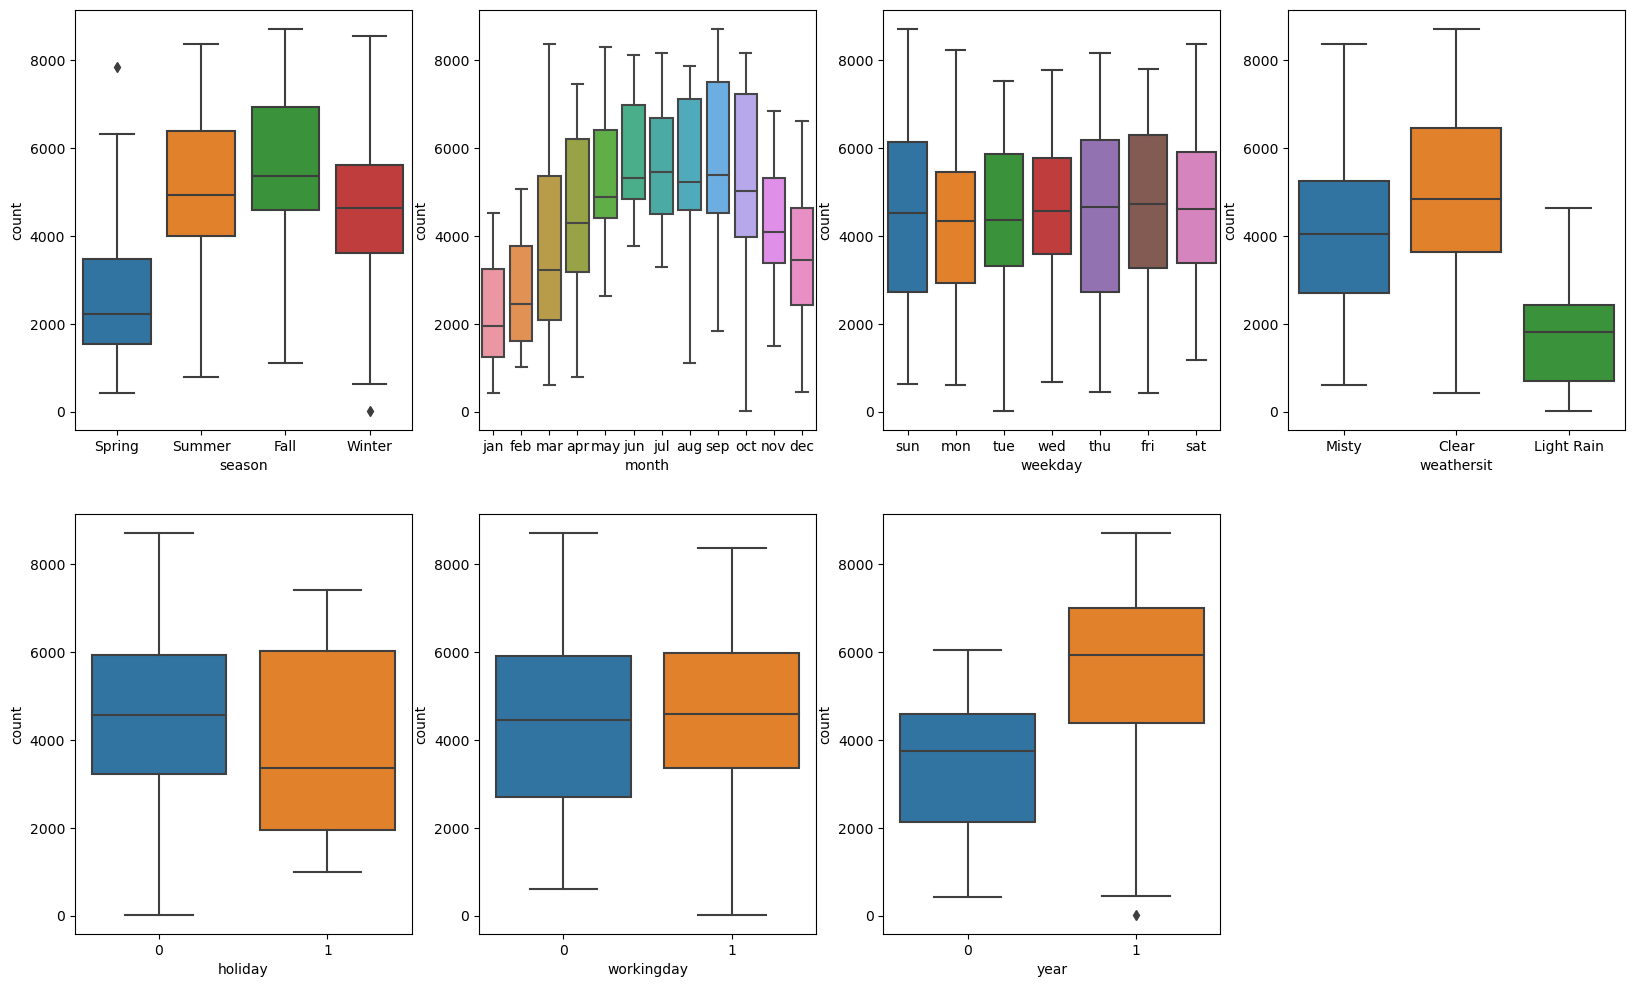

In [14]:
# Instead of creating a boxplot seperatly for every Column we will use Subplot to create the plot together.

plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x='season', y='count', data=df)

plt.subplot(2,4,2)
sns.boxplot(x='month', y='count', data=df)

plt.subplot(2,4,3)
sns.boxplot(x='weekday', y='count', data=df)

plt.subplot(2,4,4)
sns.boxplot(x='weathersit', y='count', data=df)

plt.subplot(2,4,5)
sns.boxplot(x='holiday', y='count', data=df)

plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='count', data=df)

plt.subplot(2,4,7)
sns.boxplot(x='year', y='count', data=df)
plt.show()

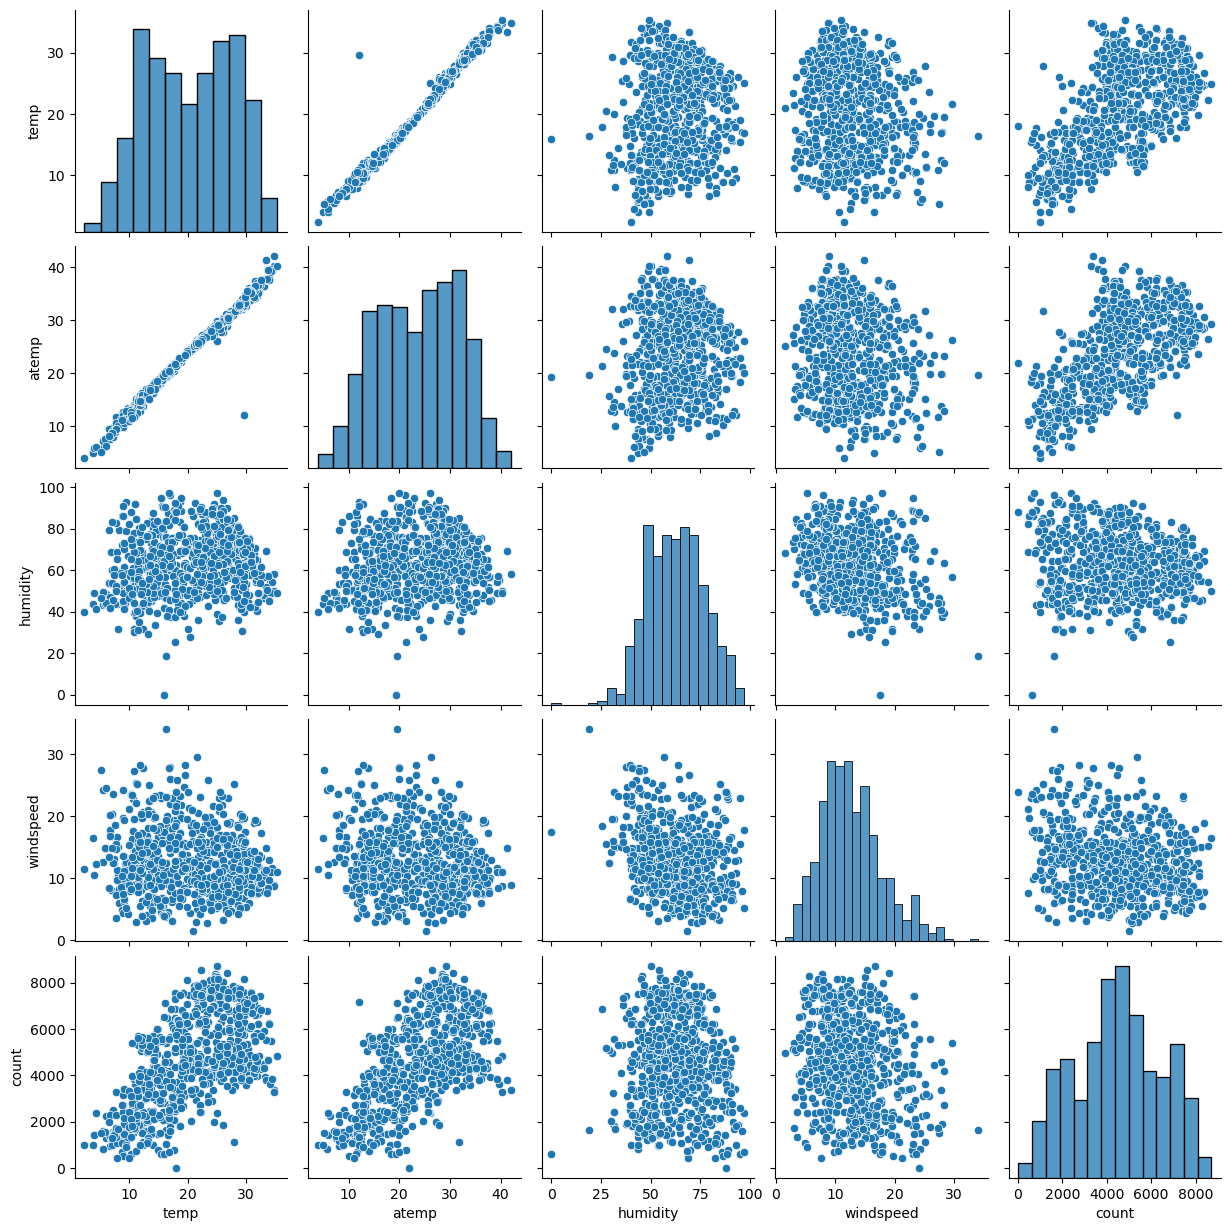

In [15]:
# 2.Visualising Numerical Variables
# Note : While columns such as weekday, Season are also numerical variable, they need to be converted to Categorical String variable.

sns.pairplot(data=df, vars=['temp','atemp','humidity','windspeed','count'])
plt.show()

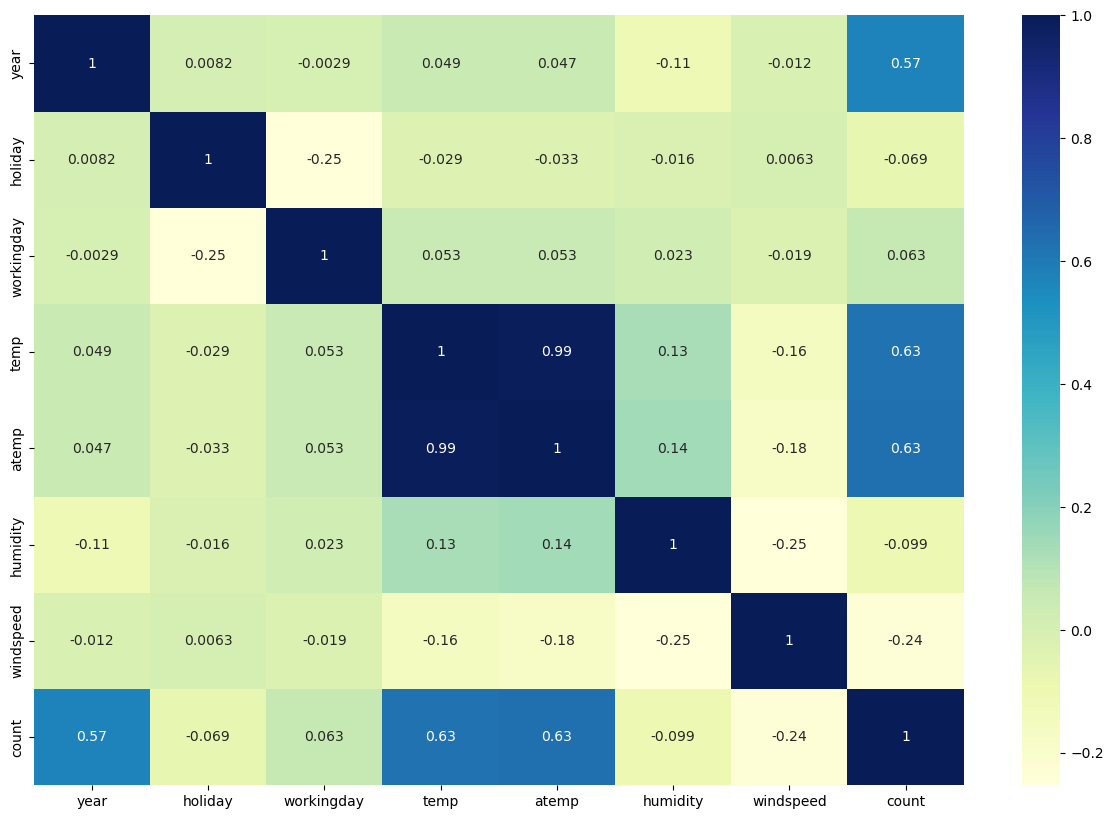

In [16]:
# 3.Visualising Correlation between different Variables

plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

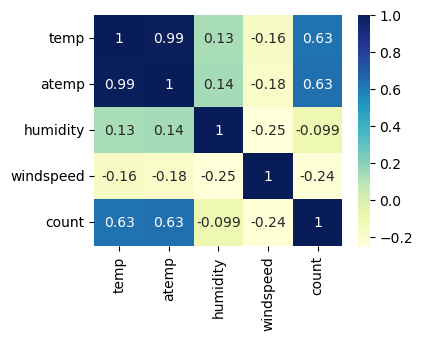

In [17]:
# 4.Visualising Correlation between different Numerical Variables

plt.figure(figsize = (4, 3))
sns.heatmap(df[['temp','atemp','humidity','windspeed','count']].corr(), annot=True, cmap='YlGnBu')
plt.show()

## Step 3: Data Preparation

In [18]:
# 1.Creating Dummy variables with k-1 columns where k = number of individual unique value. 
# Then, concatenating it to the original Dataframe and dropping the original Column as it is no longer need and is redundant.

# For weather Column

weather = pd.get_dummies(df['weathersit'], drop_first=True)
df = pd.concat([df, weather], axis=1)
df = df.drop('weathersit', axis=1)
df.head()

,season,year,month,holiday,weekday,workingday,temp,atemp,humidity,windspeed,count,Light Rain,Misty
0,Spring,0,jan,0,sun,0,14.110847,18.18125,80.5833,10.749882,985,0,1
1,Spring,0,jan,0,mon,0,14.902598,17.68695,69.6087,16.652113,801,0,1
2,Spring,0,jan,0,tue,1,8.050924,9.47025,43.7273,16.636703,1349,0,0
3,Spring,0,jan,0,wed,1,8.200000,10.60610,59.0435,10.739832,1562,0,0
4,Spring,0,jan,0,thu,1,9.305237,11.46350,43.6957,12.522300,1600,0,0


In [19]:
# For season Column

season = pd.get_dummies(df['season'], drop_first=True)
df = pd.concat([df, season], axis=1)
df = df.drop('season', axis=1)
df.head()

,year,month,holiday,weekday,workingday,temp,atemp,humidity,windspeed,count,Light Rain,Misty,Spring,Summer,Winter
0,0,jan,0,sun,0,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0
1,0,jan,0,mon,0,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0
2,0,jan,0,tue,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,0,jan,0,wed,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,0,jan,0,thu,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0


In [20]:
# For month Column

month = pd.get_dummies(df['month'], drop_first=True)
df = pd.concat([df, month], axis=1)
df = df.drop('month', axis=1)
df.head()

,year,holiday,weekday,workingday,temp,atemp,humidity,windspeed,count,Light Rain,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,sun,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,mon,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,tue,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,wed,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,thu,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,1,0,0,0,0,0,0,0


In [21]:
# For weekday Column

weekday = pd.get_dummies(df['weekday'], drop_first=True)
df = pd.concat([df, weekday], axis=1)
df = df.drop('weekday', axis=1)
df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Light Rain,Misty,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# Shape of New DataFrame

df.shape

(730, 30)

## Step 4 : Building the Model

In [23]:
# 1.Splitting the data into Training and test data with 70:30 Ratio using train_test_split method.

df_train, df_test = train_test_split(df, train_size=0.70, random_state=100)
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(730, 30)
(510, 30)
(220, 30)


In [24]:
# 2.Scaling Train data using MinMaxScaler(MinMaxScaler scales data between 0 and 1)

var_list = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
scaler = MinMaxScaler()
df_train[var_list] = scaler.fit_transform(df_train[var_list])
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Light Rain,Misty,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.029412,0.345098,...,0.084314,0.086275,0.084314,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.169124,0.475867,...,0.278131,0.281045,0.278131,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# 3.Build the model

#Initilize the Linear Regression Model

lr = LinearRegression()

In [26]:
#Creating y_train(Target variable) and X_train(all other independent variables)

y_train = df_train.pop('count')
X_train = df_train

In [27]:
#Fit the model with y_train and X_train data.

lr.fit(X_train, y_train)

LinearRegression()

In [28]:
# 4. Use RFE(Recursive Feature Elimination) to limit the variables.

#Initilzing RFE and giving number of features to select.

rfe = RFE(lr, n_features_to_select = 15)

In [29]:
#Fit the data to RFE

rfe = rfe.fit(X_train, y_train)

In [30]:
#Lets see which features were selected and which features were not selected and thier rankings

list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Light Rain', True, 1),
 ('Misty', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 11),
 ('sun', True, 1),
 ('thu', False, 14),
 ('tue', False, 9),
 ('wed', False, 10)]

In [31]:
#Columns that were selcted by RFE

X_train.columns[rfe.support_]

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'Light Rain', 'Misty', 'Spring', 'Summer', 'Winter', 'jan', 'jul',
       'sep', 'sun'],
      dtype='object')

In [32]:
#Columns that were not selected by RFE

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon',
       'sat', 'thu', 'tue', 'wed'],
      dtype='object')

In [33]:
# 5.Taking only RFE selected features and adding Constant to it.
# Note : Statsmodel by default draws the line from the center(0,0), we need to give a Constant(intercept) value for it to consider.

var_list = X_train.columns[rfe.support_]
X_train_lm = X_train[var_list]
X_train_lm_sm = sm.add_constant(X_train_lm)
X_train_lm_sm.head()

,const,year,holiday,workingday,temp,humidity,windspeed,Light Rain,Misty,Spring,Summer,Winter,jan,jul,sep,sun
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,1,1,0,0,0,0,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,1
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,1,0,1,0,0,0,0,0


In [34]:
# 6.Initilize a OLS(Ordinary Least Squares regression) using updated X_train and y_train and fit the model.
# Once fitted, we can use an inbuilt method called summary() to check p value, R^2 value and other important values.

#Build 1
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          4.22e-191
Time:                        19:28:02   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.000       0.181       0.323
year           0.2305      0.008     28.795      0.000       0.215       0.246
holiday       -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday     0.0433      0.012      3.762      0.000       0.021       0.066
temp           0.5096      0.034     14.837      0.000       0.442       0.577
humidity      -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed     -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Light Rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Misty         -0.0563      0.010     -5.439      0.000      -0.077      -0.036
Spring        -0.0509      0.021     -2.464      0.014      -0.091      -0.010
Summer         0.0508      0.015      3.423      0.001       0.022       0.080
Winter         0.0933      0.017      5.403      0.000       0.059       0.127
jan           -0.0345      0.017     -1.989      0.047      -0.069      -0.000
jul           -0.0529      0.018     -2.931      0.004      -0.088      -0.017
sep            0.0814      0.016      4.945      0.000       0.049       0.114
sun            0.0536      0.014      3.694      0.000       0.025       0.082
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# 7. lets check the VIF(variance Inflation Factor). VIF can be found using an variance_inflation_factor method.

vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
8,Spring,4.53
10,Winter,3.46
9,Summer,2.85
7,Misty,2.29
0,year,2.09
14,sun,1.98


In [36]:
#Since humidity VIF is high(greater than 10), we can drop the variable and rebuild the model.

# 8. Drop the Variable.
X_train_lm = X_train_lm.drop('humidity', axis=1)

#### Note : Step 6, 7 and 8 will be performed repeatedly to get the best version of the model. The criteria to drop the model is flexiable depending on the problem. Here p value greater than 0.04 and VIF value greater than 10 are being dropped. VIF value > 5 and <=10 have to be inspected to see if the variable is significant or not. If significant, we can drop other variables to see if the VIF value of current variable decreases.

In [37]:
#Rebuilding the Model

#Build 2
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.60e-188
Time:                        19:28:02   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.520      0.000       0.112       0.235
year           0.2345      0.008     29.009      0.000       0.219       0.250
holiday       -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday     0.0464      0.012      3.966      0.000       0.023       0.069
temp           0.4722      0.034     14.005      0.000       0.406       0.538
windspeed     -0.1563      0.025     -6.286      0.000      -0.205      -0.107
Light Rain    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Misty         -0.0813      0.009     -9.437      0.000      -0.098      -0.064
Spring        -0.0599      0.021     -2.867      0.004      -0.101      -0.019
Summer         0.0445      0.015      2.967      0.003       0.015       0.074
Winter         0.0784      0.017      4.562      0.000       0.045       0.112
jan           -0.0392      0.018     -2.227      0.026      -0.074      -0.005
jul           -0.0479      0.018     -2.614      0.009      -0.084      -0.012
sep            0.0755      0.017      4.527      0.000       0.043       0.108
sun            0.0583      0.015      3.968      0.000       0.029       0.087
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
7,Spring,3.07
8,Summer,2.34
0,year,2.08
9,Winter,1.98
13,sun,1.97
10,jan,1.62
11,jul,1.59


In [39]:
# holiday p value was greater than 4, so dropping.

X_train_lm = X_train_lm.drop('holiday', axis=1)

In [40]:
# Rebuilding Model

#Build 3
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          8.68e-189
Time:                        19:28:02   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1657      0.031      5.292      0.000       0.104       0.227
year           0.2346      0.008     28.941      0.000       0.219       0.251
workingday     0.0546      0.011      4.967      0.000       0.033       0.076
temp           0.4724      0.034     13.966      0.000       0.406       0.539
windspeed     -0.1572      0.025     -6.306      0.000      -0.206      -0.108
Light Rain    -0.2896      0.024    -11.895      0.000      -0.337      -0.242
Misty         -0.0807      0.009     -9.351      0.000      -0.098      -0.064
Spring        -0.0607      0.021     -2.899      0.004      -0.102      -0.020
Summer         0.0448      0.015      2.980      0.003       0.015       0.074
Winter         0.0775      0.017      4.499      0.000       0.044       0.111
jan           -0.0398      0.018     -2.252      0.025      -0.074      -0.005
jul           -0.0468      0.018     -2.549      0.011      -0.083      -0.011
sep            0.0736      0.017      4.406      0.000       0.041       0.106
sun            0.0667      0.014      4.710      0.000       0.039       0.094
==============================================================================
Omnibus:                       73.767   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.147
Skew:                          -0.734   Prob(JB):                     2.30e-41
Kurtosis:                       5.579   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
6,Spring,2.99
7,Summer,2.33
0,year,2.08
8,Winter,1.91
12,sun,1.84
9,jan,1.62
10,jul,1.59


In [42]:
# We have no p value greater than 4 and VIF greater than 10. Since we have a variable with VIF >5, we need to inspect it further.
# Since temp has significant relation with count(0.63 as we saw in the Coorelation heatmap we had drawn up earlier), we will try 
# to drop other insignificant variables to see if VIF of temp Improves. 'Jan' has very low Coef value, so its being dropped.

X_train_lm = X_train_lm.drop('jan', axis=1)

In [43]:
# Rebuilding the Model.

#Build 4
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          7.12e-189
Time:                        19:28:02   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1492      0.031      4.881      0.000       0.089       0.209
year           0.2339      0.008     28.756      0.000       0.218       0.250
workingday     0.0545      0.011      4.938      0.000       0.033       0.076
temp           0.4920      0.033     14.991      0.000       0.427       0.556
windspeed     -0.1499      0.025     -6.040      0.000      -0.199      -0.101
Light Rain    -0.2883      0.024    -11.795      0.000      -0.336      -0.240
Misty         -0.0817      0.009     -9.428      0.000      -0.099      -0.065
Spring        -0.0664      0.021     -3.182      0.002      -0.107      -0.025
Summer         0.0481      0.015      3.196      0.001       0.019       0.078
Winter         0.0838      0.017      4.910      0.000       0.050       0.117
jul           -0.0486      0.018     -2.637      0.009      -0.085      -0.012
sep            0.0740      0.017      4.414      0.000       0.041       0.107
sun            0.0664      0.014      4.671      0.000       0.038       0.094
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
6,Spring,2.38
7,Summer,2.32
0,year,2.07
8,Winter,1.91
11,sun,1.83
9,jul,1.58
5,Misty,1.57


In [45]:
# since the VIF of temp has come down and no significant drop in R^2 value was observed, we will continue this method.

X_train_lm = X_train_lm.drop('workingday', axis=1)

In [46]:
# Rebuilding the model

#Build 5
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.2
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          6.54e-185
Time:                        19:28:02   Log-Likelihood:                 493.80
No. Observations:                 510   AIC:                            -963.6
Df Residuals:                     498   BIC:                            -912.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1935      0.030      6.468      0.000       0.135       0.252
year           0.2344      0.008     28.168      0.000       0.218       0.251
temp           0.4935      0.034     14.698      0.000       0.428       0.560
windspeed     -0.1519      0.025     -5.982      0.000      -0.202      -0.102
Light Rain    -0.2807      0.025    -11.246      0.000      -0.330      -0.232
Misty         -0.0787      0.009     -8.897      0.000      -0.096      -0.061
Spring        -0.0693      0.021     -3.244      0.001      -0.111      -0.027
Summer         0.0472      0.015      3.070      0.002       0.017       0.077
Winter         0.0791      0.017      4.537      0.000       0.045       0.113
jul           -0.0515      0.019     -2.734      0.006      -0.089      -0.015
sep            0.0733      0.017      4.271      0.000       0.040       0.107
sun            0.0229      0.011      2.006      0.045       0.000       0.045
==============================================================================
Omnibus:                       76.531   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.911
Skew:                          -0.792   Prob(JB):                     3.84e-39
Kurtosis:                       5.412   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
1,temp,5.12
2,windspeed,4.62
6,Summer,2.23
5,Spring,2.08
0,year,2.07
7,Winter,1.78
8,jul,1.58
4,Misty,1.55
9,sep,1.33
10,sun,1.18


In [48]:
# since the VIF of temp has come down and no significant drop in R^2 value was observed, we will continue this method.

X_train_lm = X_train_lm.drop('sun', axis=1)

In [49]:
# Rebuilding the model

#Build 6
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.8
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          3.00e-185
Time:                        19:28:02   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1974      0.030      6.593      0.000       0.139       0.256
year           0.2339      0.008     28.037      0.000       0.218       0.250
temp           0.4920      0.034     14.611      0.000       0.426       0.558
windspeed     -0.1496      0.025     -5.880      0.000      -0.200      -0.100
Light Rain    -0.2800      0.025    -11.186      0.000      -0.329      -0.231
Misty         -0.0785      0.009     -8.851      0.000      -0.096      -0.061
Spring        -0.0696      0.021     -3.247      0.001      -0.112      -0.027
Summer         0.0469      0.015      3.038      0.003       0.017       0.077
Winter         0.0792      0.017      4.527      0.000       0.045       0.114
jul           -0.0510      0.019     -2.697      0.007      -0.088      -0.014
sep            0.0734      0.017      4.263      0.000       0.040       0.107
==============================================================================
Omnibus:                       69.942   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.479
Skew:                          -0.711   Prob(JB):                     9.57e-38
Kurtosis:                       5.450   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
1,temp,5.09
2,windspeed,4.60
6,Summer,2.23
0,year,2.07
5,Spring,2.07
7,Winter,1.77
8,jul,1.58
4,Misty,1.55
9,sep,1.33
3,Light Rain,1.08


In [51]:
# since the VIF of temp has come down and no significant drop in R^2 value was observed, we will continue this method.

X_train_lm = X_train_lm.drop('Summer', axis=1)

In [52]:
# Rebuilding the model

#Build 7
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     266.6
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.70e-184
Time:                        19:28:02   Log-Likelihood:                 487.07
No. Observations:                 510   AIC:                            -954.1
Df Residuals:                     500   BIC:                            -911.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.024     10.372      0.000       0.204       0.299
year           0.2346      0.008     27.901      0.000       0.218       0.251
temp           0.4504      0.031     14.520      0.000       0.389       0.511
windspeed     -0.1412      0.026     -5.535      0.000      -0.191      -0.091
Light Rain    -0.2813      0.025    -11.146      0.000      -0.331      -0.232
Misty         -0.0779      0.009     -8.721      0.000      -0.096      -0.060
Spring        -0.1151      0.015     -7.456      0.000      -0.145      -0.085
Winter         0.0420      0.013      3.333      0.001       0.017       0.067
jul           -0.0720      0.018     -4.063      0.000      -0.107      -0.037
sep            0.0536      0.016      3.338      0.001       0.022       0.085
==============================================================================
Omnibus:                       68.373   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.818
Skew:                          -0.681   Prob(JB):                     1.80e-38
Kurtosis:                       5.514   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
1,temp,4.61
2,windspeed,4.00
0,year,2.06
5,Spring,1.63
4,Misty,1.51
6,Winter,1.38
7,jul,1.35
8,sep,1.20
3,Light Rain,1.08


In [54]:
# Since all VIF value is unnder 5 and no p value is above 4, we will conclude this the best possible model to predict Count.

### We can cosider the above model as the best possible model, as it seems to have a very low multicolinearity(VIF) between the predictors and the p-values for all the predictors seems to be significant.

## Step 6: Residual Analysis on the training data and model validation.

In [55]:
# 1.Predicting the Y_train value(Count) using the model

y_train_pred = lm_model.predict(X_train_lm_sm)
y_train_pred.head()

576    0.743956
426    0.456371
728    0.387892
482    0.559832
111    0.275586
dtype: float64

In [56]:
# 2.Calculating Residual value

res = y_train - y_train_pred
res.head()

576    0.083702
426    0.008885
728   -0.183796
482   -0.076859
111   -0.084491
dtype: float64

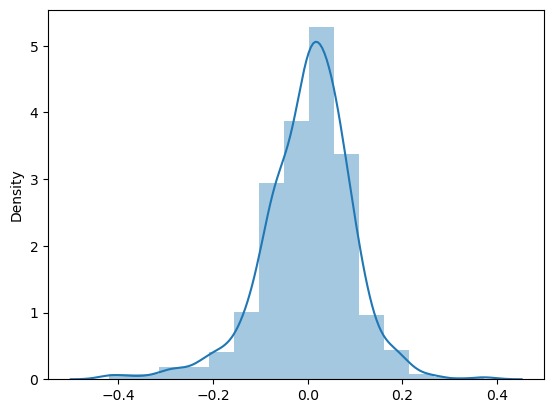

In [57]:
# 3.Visualising the residual value to check if the model not failing any conditions

sns.distplot(res, bins=15)
plt.show()

## Step 7: Making Predictions Using the Final Model

In [58]:
# 4.Scaling the test Dataset

var_list = ['temp', 'atemp', 'humidity', 'windspeed','count']
df_test[var_list] = scaler.transform(df_test[var_list])

In [59]:
# 5.Extracting y_test and X_test

y_test = df_test.pop('count')
X_test = df_test


In [60]:
# 6. Dropping all the Columns that we have dropped in the training of the model

X_test = X_test.drop(['holiday', 'workingday', 'atemp', 'humidity', 'Summer','aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'nov',
       'oct', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'], axis=1)
X_test.head()

,year,temp,windspeed,Light Rain,Misty,Spring,Winter,jul,sep
184,0,0.831783,0.084219,0,1,0,0,1,0
535,1,0.901354,0.153728,0,0,0,0,0,0
299,0,0.511964,0.334206,0,1,0,1,0,0
221,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0.817246,0.537414,0,0,0,0,0,0


In [61]:
# 7. Adding the constant to X_test and making Predictions to find y_pred value.

X_test_sm = sm.add_constant(X_test)
y_pred = lm_model.predict(X_test_sm)

In [62]:
# R^2 Score of the test Data 

r_squared_test = round(r2_score(y_test, y_pred), 4)
print(r_squared_test)

0.8067


In [63]:
# R^2 Score of the train Data that we obtained earlier.

r_squared_train = round(r2_score(y_train, y_train_pred),4)
print(r_squared_train)

0.8275


## Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

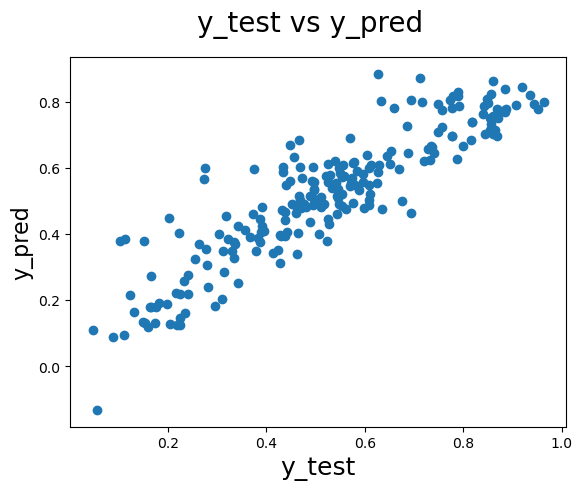

In [64]:
# Plotting Y_test vs Y_pred Scatter plot

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [65]:
round(lm_model.params,4)

const         0.2515
year          0.2346
temp          0.4504
windspeed    -0.1412
Light Rain   -0.2813
Misty        -0.0779
Spring       -0.1151
Winter        0.0420
jul          -0.0720
sep           0.0536
dtype: float64

In [66]:
# Calculating Adjusted-R^2 value for Train and Test a dataset

adjusted_r2_train = round(1-(1-r_squared_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
adjusted_r2_test = round(1-(1-r_squared_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2_train)
print(adjusted_r2_test)

0.8171
0.7984


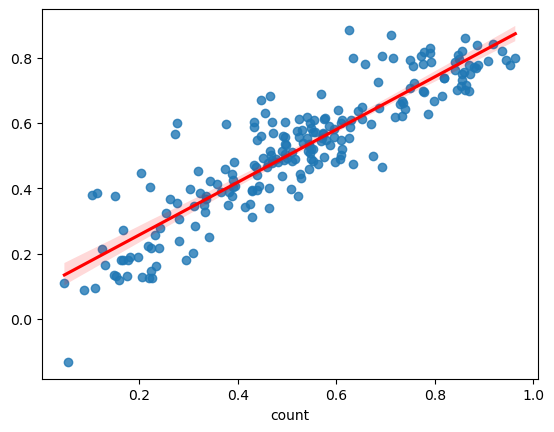

In [67]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, fit_reg=True, line_kws={"color": "red"})
plt.show()

### Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.8275
- Test dataset R^2           : 0.8067
- Train dataset Adjusted R^2 : 0.8171    
- Test dataset Adjusted R^2  : 0.7984